In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import svm

In [2]:
def plot_data(data):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
    ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
    ax.legend()
    plt.show()

In [3]:
def plotDecisionBoundary(clf, data):  # 绘制超平面函数
    x_min, x_max = np.array(data['X1']).min(), np.array(data['X1']).max()
    y_min, y_max = np.array(data['X2']).min(), np.array(data['X2']).max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors = 'red')

In [4]:
def loaddata(no):
    if no==0:
        data = pd.DataFrame([[0, 0], [1, 1.5], [2, 1], [3, 0.5]], columns=['X1', 'X2'])
        data['y'] = [0, 1, 1, 1]
    else:
        data = pd.DataFrame([[0, 1], [1, 0], [0, 0], [1, 1]], columns=['X1', 'X2'])
        data['y'] = [1, 1, 0, 0]
    plot_data(data)
    return data

In [5]:
def train_test_plot(svc, data, title):
    clfs = svc.fit(data[['X1', 'X2']], data['y'])
    print('Score of ' + title + ' SVM: ' + str(svc.score(data[['X1', 'X2']], data['y'])))

    data[title + ' SVM Confidence'] = svc.decision_function(data[['X1', 'X2']])

    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(data['X1'], data['X2'], s=50, c=data[title + ' SVM Confidence'], cmap='seismic')
    plotDecisionBoundary(clfs, data) 
    ax.set_title(title + ' SVM Decision Confidence')
    plt.show()

In [6]:
def run_all_svms(data):
    svc_linear = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
    train_test_plot(svc_linear, data, "Linear")

    svc_ploy_2 = svm.SVC(C=100, degree=2, kernel='poly')
    train_test_plot(svc_ploy_2, data, 'Polynomial Kernel (2)')

    svc_ploy_3 = svm.SVC(C=100, degree=3, kernel='poly')
    train_test_plot(svc_ploy_3, data, 'Polynomial Kernel (3)')

    svc_gaussian = svm.SVC(C=100, gamma=10, kernel='rbf', probability=True)
    train_test_plot(svc_gaussian, data, 'Gaussian Kernel')

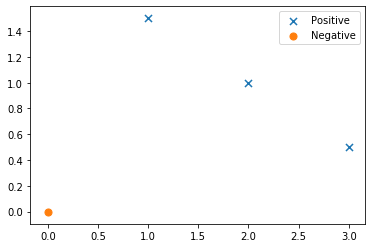

Score of Linear SVM: 1.0


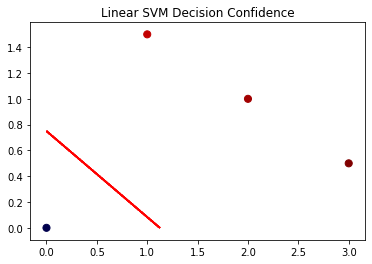

Score of Polynomial Kernel (2) SVM: 1.0


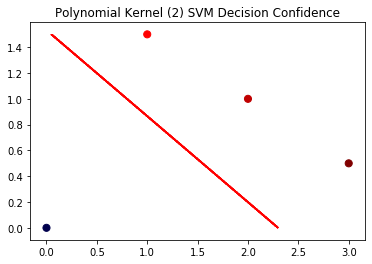

Score of Polynomial Kernel (3) SVM: 1.0


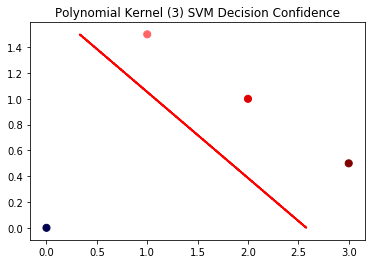

Score of Gaussian Kernel SVM: 1.0


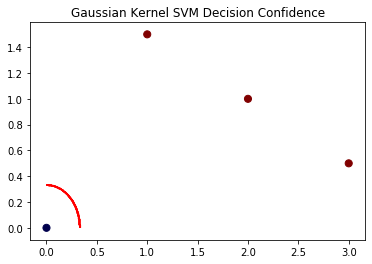

,X1,X2,y,Linear SVM Confidence,Polynomial Kernel (2) SVM Confidence,Polynomial Kernel (3) SVM Confidence,Gaussian Kernel SVM Confidence
0,0,0.0,0,-0.529412,-1.000000,-1.000000,-1.0
1,1,1.5,1,1.000000,1.000000,1.000000,1.0
2,2,1.0,1,1.117647,1.319527,1.497952,1.0
3,3,0.5,1,1.235294,1.662722,2.072371,1.0


In [7]:
data = loaddata(0)
run_all_svms(data)
data

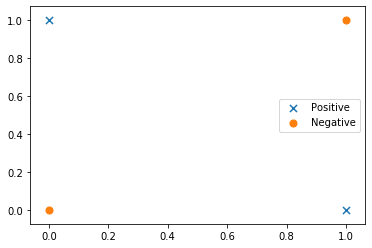

Score of Linear SVM: 0.5


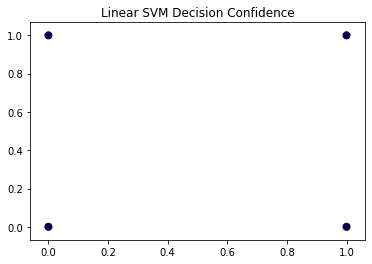

Score of Polynomial Kernel (2) SVM: 1.0


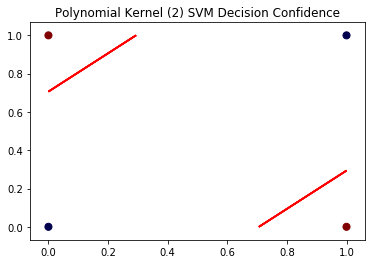

Score of Polynomial Kernel (3) SVM: 1.0


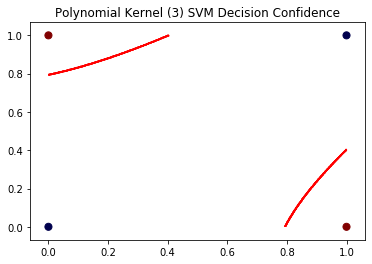

Score of Gaussian Kernel SVM: 1.0


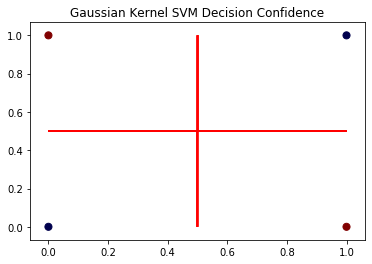

,X1,X2,y,Linear SVM Confidence,Polynomial Kernel (2) SVM Confidence,Polynomial Kernel (3) SVM Confidence,Gaussian Kernel SVM Confidence
0,0,1,1,0.0,1.000203,1.000238,1.000000
1,1,0,1,0.0,0.999390,0.999286,0.999955
2,0,0,0,0.0,-0.999797,-0.999762,-1.000000
3,1,1,0,0.0,-0.999797,-0.999762,-0.999955


In [8]:
data = loaddata(1)
run_all_svms(data)
data